In [1]:
import pandas as pd
%matplotlib inline
import matplotlib as plt
pd.set_option("display.max_columns",999)
import numpy as np
import json

# Getting some info from JSON file

In [2]:
df = pd.read_pickle("./cuentalo_json_to.pkl")

#### Ahora el codigo para identificar pais/ciudad

In [3]:
from country_city_sets import *
check_city_errors()

set()


In [4]:
from utils import *

# Leer del archivo

In [5]:
# si ya lo tenemos generado, correr esto
final_bundle_pd = pd.read_csv("final_locations.csv")

##### ahora podriamos arreglar los sitios con multiples nombres y eso

In [6]:
# paises unicos
unique_countries=pd.concat([final_bundle_pd[final_bundle_pd['location_diagnosis']>0].pais_clean, final_bundle_pd[final_bundle_pd['parent_location_diagnosis']>0].parent_pais_clean]).dropna().unique()

In [7]:
countries['clean_name_en']=countries.name_en.apply(clean_string)
countries['clean_name']=countries.name.apply(clean_string)

In [8]:
countries.head()

,id,name_en,name,clean_name_en,clean_name
0,4,Afghanistan,Afganistán,afghanistan,afganistan
1,248,Åland Islands,Åland,aland islands,aland
2,8,Albania,Albania,albania,albania
3,12,Algeria,Argelia,algeria,argelia
4,16,American Samoa,Samoa Americana,american samoa,samoa americana


In [9]:
for country in unique_countries:
    subset=countries[(countries.clean_name==country) | (countries.clean_name_en==country)]
    if (len(subset==1)):
        country_dupes_dict[country]=subset.name.values[0]
    else:
        print ("error con ",country)
        print (subset)

In [12]:
cities[cities.name.str.contains('san martin')]

,name,country,subcountry,geonameid


In [13]:
corrected_df = final_bundle_pd.copy()
def cleany(country):
    return country_dupes_dict[country] 
    
corrected_df.pais_clean = final_bundle_pd[(~final_bundle_pd.pais_clean.isnull()) & (final_bundle_pd.location_diagnosis>0)].pais_clean.apply(cleany)
corrected_df.parent_pais_clean = final_bundle_pd[(~final_bundle_pd.parent_pais_clean.isnull()) & (final_bundle_pd.parent_location_diagnosis>0)].parent_pais_clean.apply(cleany)

In [14]:
sorted(list(corrected_df.pais_clean.dropna().unique()))

['Afganistán',
 'Albania',
 'Alemania',
 'Andorra',
 'Angola',
 'Anguila',
 'Antigua y Barbuda',
 'Antártida',
 'Arabia Saudita',
 'Argelia',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Bahamas',
 'Bangladés',
 'Barbados',
 'Baréin',
 'Belice',
 'Benín',
 'Bermudas',
 'Bielorrusia',
 'Bolivia',
 'Bosnia y Herzegovina',
 'Brasil',
 'Brunéi',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Bután',
 'Bélgica',
 'Camboya',
 'Camerún',
 'Canadá',
 'Catar',
 'Chad',
 'Chile',
 'China',
 'Chipre',
 'Colombia',
 'Corea del Norte',
 'Corea del Sur',
 'Costa Rica',
 'Costa de Marfil',
 'Croacia',
 'Cuba',
 'Curazao',
 'Dinamarca',
 'Dominica',
 'Ecuador',
 'Egipto',
 'El Salvador',
 'Emiratos Árabes Unidos',
 'Eslovaquia',
 'Eslovenia',
 'España',
 'Estados Unidos',
 'Estonia',
 'Etiopía',
 'Filipinas',
 'Finlandia',
 'Fiyi',
 'Francia',
 'Gambia',
 'Georgia',
 'Ghana',
 'Gibraltar',
 'Grecia',
 'Groenlandia',
 'Guadalupe',
 'Guatemala',
 'Guayana Francesa',
 'Guinea',
 'Guinea E

In [15]:
# ciudades unicas
unique_cities=pd.concat([final_bundle_pd[final_bundle_pd['location_diagnosis']>0].ciudad_clean, final_bundle_pd[final_bundle_pd['parent_location_diagnosis']>0].parent_ciudad_clean]).dropna().unique()

In [16]:
cit_coun=[(c,country_from_code[country_of_city[c][0]] if c in country_of_city else "ERROR") for c in sorted(list(unique_cities))]
cit_coun_pd=pd.DataFrame(cit_coun)
cit_coun_pd.columns=["ciudad","pais"]
cit_coun_pd.to_excel("./lista_a_revisar_ciudad_pais.xls",index=False)

In [17]:
cities.head()

,name,country,subcountry,geonameid
0,les Escaldes,Andorra,Escaldes-Engordany,3040051
1,Andorra la Vella,Andorra,Andorra la Vella,3041563
2,Umm al Qaywayn,United Arab Emirates,Umm al Qaywayn,290594
3,Ras al-Khaimah,United Arab Emirates,Raʼs al Khaymah,291074
4,Khawr Fakkān,United Arab Emirates,Ash Shāriqah,291696


In [18]:
country_from_code[country_of_city['batman'][0]]

'turkey'

In [19]:
cities[cities.name.str.contains('lombia')]

,name,country,subcountry,geonameid
3873,Puerto Colombia,Colombia,Atlántico,3671497
4151,Colombia,Cuba,Las Tunas,3563856


In [20]:
unique_cities

array(['london', 'caceres', 'madrid', ..., 'diyarbakır', 'fremont',
       'rancho cucamonga'], dtype=object)

In [21]:
cities['clean_name']=cities.name.apply(clean_string)

In [22]:
# quitamos duplicados y nombres raros de ciudades
for city in unique_cities:
    subset=cities[(cities.clean_name==city) ]
    if (len(subset==1)):
        city_dupes_dict[city]=subset.name.values[0]
    else:
        if city not in city_dupes_dict:
            print ("error con ",city,len(subset.name.values))

error con  sinaloa 0


In [23]:
city_dupes_dict['sinaloa']='Sinaloa'

In [24]:
def cleany_city(city):
    return city_dupes_dict[city] 
    
corrected_df.ciudad_clean = final_bundle_pd[(~final_bundle_pd.ciudad_clean.isnull()) & (final_bundle_pd.location_diagnosis>0)].ciudad_clean.apply(cleany_city)
corrected_df.parent_ciudad_clean = final_bundle_pd[(~final_bundle_pd.parent_ciudad_clean.isnull()) & (final_bundle_pd.parent_location_diagnosis>0)].parent_ciudad_clean.apply(cleany_city)

In [25]:
corrected_df.head(10)


,tweet_id,ciudad_clean,pais_clean,location_diagnosis,parent_ciudad_clean,parent_pais_clean,parent_location_diagnosis
0,990380137937035265,NaN,Venezuela,3.0,NaN,NaN,-1.0
1,990380135638593538,London,Reino Unido,5.0,Lleida,España,5.0
2,990380135500181505,NaN,NaN,-1.0,NaN,NaN,-2.0
3,990380134715871233,Cáceres,España,12.0,NaN,NaN,-2.0
4,990380130362187776,Madrid,España,5.0,NaN,España,3.0
5,990380129162616833,NaN,NaN,-2.0,NaN,NaN,-1.0
6,990380128361418752,NaN,NaN,-1.0,NaN,NaN,-1.0
7,990380127992340480,Vila-real,España,5.0,NaN,NaN,-1.0
8,990380127627415553,NaN,NaN,-2.0,Sevilla,España,9.0
9,990380126960537600,NaN,Argentina,3.0,NaN,NaN,-1.0


In [26]:
corrected_df.to_csv("final_locations_clean.csv")

### Ahora los unimos con el df principal

In [27]:
df.head()

,country,created_at,favorite_count,full_text,id,lat,location,lon,parent_country,parent_created_at,parent_id,parent_lat,parent_location,parent_lon,parent_place,parent_text,parent_time_zone,parent_user_followers,parent_user_id,place,quote_count,retweet_count,statuses_count,time_zone,tweet_type,user_followers_count,user_id,user_screen_name
990380137937035265,None,2018-04-28 23:59:59,0,RT @Odi_sea: Con 17 años desde una cena de gra...,990380137937035265,-999.0,Venezuela,-999.0,None,2018-04-28 00:41:56,990028305704333312,None,,None,None,Con 17 años desde una cena de graduación un ho...,Amsterdam,301,112541236,None,-1,3176,48132,Caracas,retweet,1839,636716479,OrianaDiAmeliee
990380135638593538,None,2018-04-28 23:59:59,0,RT @__Kylene: Demos voz y apoyo a esta compañe...,990380135638593538,-999.0,"Baker Street, London.",-999.0,None,2018-04-28 14:57:54,990243714584010752,None,Lleida,None,None,Demos voz y apoyo a esta compañera que me ha p...,Athens,2483,814900356,None,-1,1208,9376,None,retweet,249,546250792,alannih
990380135500181505,None,2018-04-28 23:59:59,0,RT @AlejandraTuk: Mi marido me maltrata.\nPido...,990380135500181505,-999.0,,-999.0,None,2018-04-28 20:21:05,990325049893801984,None,Latinoamérica Libre ☭,None,None,Mi marido me maltrata.\nPido el divorcio.\nEl ...,Eastern Time (US & Canada),5824,529588816,None,-1,17406,10839,None,retweet,132,796195177400532993,DiKa2Pa21
990380134715871233,None,2018-04-28 23:59:59,0,RT @Antiintermedio: ¿Sabéis dónde estaban hace...,990380134715871233,-999.0,"Cáceres, España",-999.0,None,2018-04-27 21:50:49,989985242713919488,None,En el combate metapolítico,None,None,¿Sabéis dónde estaban hace 4 años y medio los ...,None,18184,2345903802,None,-1,1322,41093,None,retweet,213,936556720670863360,FranciscoJMArau
990380130362187776,None,2018-04-28 23:59:58,0,RT @Soy_Arbitra: Estar en un campo de fútbol a...,990380130362187776,-999.0,"Vallecas, Madrid",-999.0,None,2018-04-28 16:07:55,990261338810257408,None,España,None,None,"Estar en un campo de fútbol arbitrando, escuch...",Athens,1676,1538698825,None,-1,573,209,None,retweet,41,2734383970,geeeelaaaaa


In [28]:
corrected_df.set_index(['tweet_id']).head()

,ciudad_clean,pais_clean,location_diagnosis,parent_ciudad_clean,parent_pais_clean,parent_location_diagnosis
tweet_id,,,,,,
990380137937035265,NaN,Venezuela,3.0,NaN,NaN,-1.0
990380135638593538,London,Reino Unido,5.0,Lleida,España,5.0
990380135500181505,NaN,NaN,-1.0,NaN,NaN,-2.0
990380134715871233,Cáceres,España,12.0,NaN,NaN,-2.0
990380130362187776,Madrid,España,5.0,NaN,España,3.0


In [29]:
full_df=pd.concat([df,corrected_df.set_index(['tweet_id'])],axis=1)

In [30]:
full_df.head()

,country,created_at,favorite_count,full_text,id,lat,location,lon,parent_country,parent_created_at,parent_id,parent_lat,parent_location,parent_lon,parent_place,parent_text,parent_time_zone,parent_user_followers,parent_user_id,place,quote_count,retweet_count,statuses_count,time_zone,tweet_type,user_followers_count,user_id,user_screen_name,ciudad_clean,pais_clean,location_diagnosis,parent_ciudad_clean,parent_pais_clean,parent_location_diagnosis
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
990380137937035265,None,2018-04-28 23:59:59,0,RT @Odi_sea: Con 17 años desde una cena de gra...,990380137937035265,-999.0,Venezuela,-999.0,None,2018-04-28 00:41:56,990028305704333312,None,,None,None,Con 17 años desde una cena de graduación un ho...,Amsterdam,301,112541236,None,-1,3176,48132,Caracas,retweet,1839,636716479,OrianaDiAmeliee,NaN,Venezuela,3.0,NaN,NaN,-1.0
990380135638593538,None,2018-04-28 23:59:59,0,RT @__Kylene: Demos voz y apoyo a esta compañe...,990380135638593538,-999.0,"Baker Street, London.",-999.0,None,2018-04-28 14:57:54,990243714584010752,None,Lleida,None,None,Demos voz y apoyo a esta compañera que me ha p...,Athens,2483,814900356,None,-1,1208,9376,None,retweet,249,546250792,alannih,London,Reino Unido,5.0,Lleida,España,5.0
990380135500181505,None,2018-04-28 23:59:59,0,RT @AlejandraTuk: Mi marido me maltrata.\nPido...,990380135500181505,-999.0,,-999.0,None,2018-04-28 20:21:05,990325049893801984,None,Latinoamérica Libre ☭,None,None,Mi marido me maltrata.\nPido el divorcio.\nEl ...,Eastern Time (US & Canada),5824,529588816,None,-1,17406,10839,None,retweet,132,796195177400532993,DiKa2Pa21,NaN,NaN,-1.0,NaN,NaN,-2.0
990380134715871233,None,2018-04-28 23:59:59,0,RT @Antiintermedio: ¿Sabéis dónde estaban hace...,990380134715871233,-999.0,"Cáceres, España",-999.0,None,2018-04-27 21:50:49,989985242713919488,None,En el combate metapolítico,None,None,¿Sabéis dónde estaban hace 4 años y medio los ...,None,18184,2345903802,None,-1,1322,41093,None,retweet,213,936556720670863360,FranciscoJMArau,Cáceres,España,12.0,NaN,NaN,-2.0
990380130362187776,None,2018-04-28 23:59:58,0,RT @Soy_Arbitra: Estar en un campo de fútbol a...,990380130362187776,-999.0,"Vallecas, Madrid",-999.0,None,2018-04-28 16:07:55,990261338810257408,None,España,None,None,"Estar en un campo de fútbol arbitrando, escuch...",Athens,1676,1538698825,None,-1,573,209,None,retweet,41,2734383970,geeeelaaaaa,Madrid,España,5.0,NaN,España,3.0


In [28]:
#full_df.to_csv("./cuentalo_json_con_pais_ciudad.csv",index=False,header=True)

In [31]:
full_df.to_pickle("./cuentalo_json_con_pais_ciudad_limpios.pkl")

In [32]:
full_df[(full_df.pais_clean=='spain')| (full_df.parent_pais_clean=='spain')  ]

,country,created_at,favorite_count,full_text,id,lat,location,lon,parent_country,parent_created_at,parent_id,parent_lat,parent_location,parent_lon,parent_place,parent_text,parent_time_zone,parent_user_followers,parent_user_id,place,quote_count,retweet_count,statuses_count,time_zone,tweet_type,user_followers_count,user_id,user_screen_name,ciudad_clean,pais_clean,location_diagnosis,parent_ciudad_clean,parent_pais_clean,parent_location_diagnosis
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


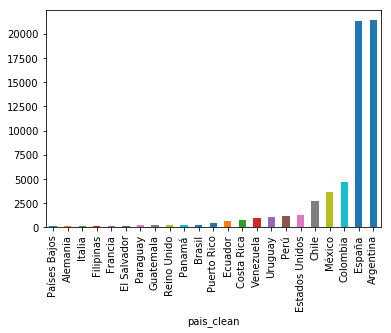

In [46]:
original_count_pais= full_df[(full_df['tweet_type']=='original')& (full_df['location_diagnosis']>0)].groupby('pais_clean').count()
original_count_pais[count_pais.id>100].id.sort_values().plot.bar()

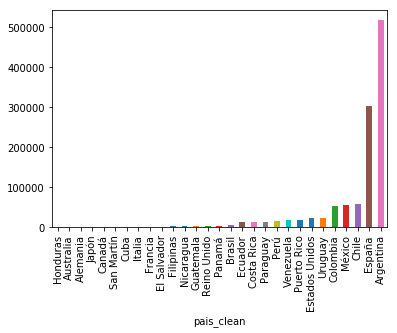

In [48]:
count_pais= full_df[ (full_df['location_diagnosis']>0)].groupby('pais_clean').count()
count_pais[count_pais.id>1000].id.sort_values().plot.bar()

In [35]:
full_df.groupby('location_diagnosis')['id'].count().sort_values()

location_diagnosis
 17.500        10
-4.000         23
 13.000        90
 17.000       110
 15.000       119
 15.001       125
 14.000       559
-7.000        863
 3.500       1240
 4.001       2340
 21.001      2636
 11.000      2768
 8.000       5176
 21.000      9985
-3.000      15314
 19.501     16375
 22.000     20762
 4.000      26248
 2.000      40759
 12.001     41047
 9.000      46711
 19.500     62445
 1.000     115658
 5.000     173913
 3.000     214537
-2.000     381414
 12.000    391049
-1.000     539722
Name: id, dtype: int64

In [36]:
error_codes=[
(-8, 'este error no deberia aparecer a menos que no hayamos visto todos los casos'),
(-7, 'se mencionan varias ciudades y paises y no pudimos discriminar'),
(-6, 'no hay este codigo'),
(-5, 'se mencionan varias ciudades y no pais y no sabemos cual puede ser'),
(-4, 'se menciona una ciudad y muchos paises y no podemos distinguir'),
(-3, 'se menciona ciudad y no podemos discriminar entre varios posibles paises  '),
(-2, 'no se menciona nada conocido'),
(-1, 'sin info - texto vacio'),
(1, 'sin info - pais sacado del time_zone'),
(2, 'solo se menciona una region'),
(3, 'solo se menciona un pais '),
(4, 'se menciona una ciudad y una region'),
(5, 'se menciona ciudad y de alli se deduce el pais'),
(6, 'se menciona ciudad y el pais se deduce del tz'),
(7, 'se menciona ciudad pero no sabemos pais'),
(8, 'se menciona ciudad pero desempatamos pais con el tz'),
(9, 'se menciona ciudad pero pueden ser varios paises -- se asume españa'),
(10, 'se menciona ciudad pero pueden ser varios paises -- se asume UK'),
(11, 'se menciona ciudad y el mismo pais varias veces'),
(12, 'se menciona una ciudad y un pais'),
(13, 'se menciona ciudad y desempatamos pais con tz'),
(14, 'se menciona una ciudad y varios paises y desempatamos mirando a que pais corresponde la ciudad  '),
(15, 'se menciona una ciudad y muchos paises -- si está se asume españa (1ero)'),
(16, 'se menciona una ciudad y muchos paises -- si está se asume UK (2do)'),
(17, 'se menciona una ciudad y muchos paises -- si está se asume mexico (3ero)'),
(17.5, 'se menciona una ciudad y muchos paises -- si está se asume argentina (4to)'),
(18, 'se mencionan varias ciudades y no pais y desempatamos con tz'),
(19, 'se mencionan varias ciudades y no pais y desempatamos con el pais correspondiente que aparezca mas veces'),
(19.5, 'se mencionan varias ciudades y no pais y elegimos la ciudad mas larga (caracteres)'),
(20, 'se menciona un pais y varias ciudades y desempatamos viendo cual corresponde'),
(21, 'se menciona una ciudad A y otra ciudad B que es pais, cogemos A,B '),
(22, 'se mencionan varias ciudades y un pais y elegimos la ciudad mas larga (caracteres)'),
]
for n in range(len(error_codes)):
    val, text = error_codes[n]
    if val>0:
        error_codes.append((val+0.001,text+", PAIS NO PEGA CON CIUDAD"))
        
error_codes_df=pd.Series({k*1.000: v for k,v in error_codes})
error_stats=pd.DataFrame()
error_stats['error']=error_codes_df.sort_values()
error_stats['cantidad']=full_df.groupby('location_diagnosis')['id'].count().sort_values()

In [37]:
error_stats.sort_values('cantidad').dropna()

,error,cantidad
17.500,se menciona una ciudad y muchos paises -- si e...,10.0
-4.000,se menciona una ciudad y muchos paises y no po...,23.0
13.000,se menciona ciudad y desempatamos pais con tz,90.0
17.000,se menciona una ciudad y muchos paises -- si e...,110.0
15.000,se menciona una ciudad y muchos paises -- si e...,119.0
15.001,se menciona una ciudad y muchos paises -- si e...,125.0
14.000,se menciona una ciudad y varios paises y desem...,559.0
-7.000,se mencionan varias ciudades y paises y no pud...,863.0
4.001,"se menciona una ciudad y una region, PAIS NO P...",2340.0
11.000,se menciona ciudad y el mismo pais varias veces,2768.0


### Ahora inspeccion visual de algunos errores

In [42]:
error_code=-3

full_df[full_df['location_diagnosis']==error_code][['location','pais_clean','ciudad_clean']].sample(n=50)

,location,pais_clean,ciudad_clean
tweet_id,,,
991058059014402050,santa fe,NaN,NaN
991079732740489216,Santa Rosa,NaN,NaN
991190610274119680,san vicente,NaN,NaN
992096620496936961,Estadio Santiago Bernabéu,NaN,NaN
990970456453910533,Santiago,NaN,NaN
991101893081432064,San Miguel,NaN,NaN
990374986807361536,"Liverpool, England",NaN,NaN
990359851950837760,San cristobal Tachira,NaN,NaN
991366104097349633,"Calchaquí, Santa Fe",NaN,NaN


In [45]:
nada=full_df[full_df['location_diagnosis']==error_code].groupby('location').size().reset_index().sort_values(0,ascending=False)
nada[nada[0]>50]

,location,0
1797,Santiago,570
1708,Santa Fe,314
1045,Paradise City,228
1540,San Miguel,210
1508,San Lorenzo,169
447,"Derry, Maine",167
2012,Veracruz de Ignacio de la Llav,159
1758,Santa Rosa,156
2341,santiago,138
1496,"San Juan, PR",137


In [134]:
full_df[(full_df['location_diagnosis']==error_code) & (full_df['location']=='Manhattan, NY')][['location','pais_clean','ciudad_clean']].sample(n=10)

,location,pais_clean,ciudad_clean
tweet_id,,,
991222311901696000,"Manhattan, NY",Estados Unidos,Manhattan
992023919891832832,"Manhattan, NY",Estados Unidos,Manhattan
991478598937862145,"Manhattan, NY",Estados Unidos,Manhattan
991668835299352576,"Manhattan, NY",Estados Unidos,Manhattan
991343532781854731,"Manhattan, NY",Estados Unidos,Manhattan
991461013663944704,"Manhattan, NY",Estados Unidos,Manhattan
991667833561141248,"Manhattan, NY",Estados Unidos,Manhattan
991544148313477122,"Manhattan, NY",Estados Unidos,Manhattan
991124416552751104,"Manhattan, NY",Estados Unidos,Manhattan


In [64]:
'puerto rico' in cities_set

True

In [121]:
cities[cities.clean_name.str.contains('york')]

,name,country,subcountry,geonameid,clean_name
2493,North York,Canada,Ontario,6091104,north york
2580,Yorkton,Canada,Saskatchewan,6185607,yorkton
7275,York,United Kingdom,England,2633352,york
20538,York,United States,Pennsylvania,4562407,york
20866,Yorkville,United States,Illinois,4917298,yorkville
21285,West New York,United States,New Jersey,5106292,west new york
21322,East New York,United States,New York,5115985,east new york
21379,New York City,United States,New York,5128581,new york city
